<a href="https://colab.research.google.com/github/ommathur54/Python/blob/master/MNIST_CNN_99%25_ACCu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://keras.io/
#We are first installing the keras package via pip install and importing the keras package
!pip install -q keras
import keras

In [ ]:
# importing the numpy package with the alias np
import numpy as np

# importing sequential model from keras.models
from keras.models import Sequential
# importing different layers and activations from keras.layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# importing np_utils from keras.utils
from keras.utils import np_utils

# importing the mnist dataset from keras.datasets 
from keras.datasets import mnist

In [ ]:
# we are downloading the MNIST dataset and splitting the data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


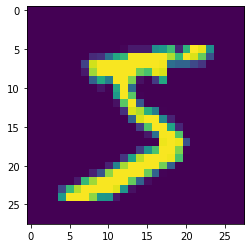

In [ ]:

# printing out the shape of x_train
print (X_train.shape)

# importing pyplot with alias plt from matplotlib package
from matplotlib import pyplot as plt
# %matplotlib inline is a magic function to show us the plots in a notebook
%matplotlib inline
# plotting the first image or the image at index zero in the training dataset
plt.imshow(X_train[0])

In [ ]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [ ]:
#Doing type conversion or changing the datatype to float32 for the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividind each pixel by 255 in the train and test data
X_train /= 255
X_test /= 255

In [ ]:
#Checking first 10 image labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# simply we can say we are doing sort of onehot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# having a look in the first 10 datapoints after onehot encoding
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:

# importing Activation, BatchNormalization and MaxPooling2D from keras.layers for performing maxpooling and batchnormalizing operations and adding non linearity via activation functions
from keras.layers import Activation,BatchNormalization
# building our sequential model using the Sequential class and creating the model object
model = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Convolution2D(10, (3, 3), activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x10    and Receptive field = 3x3
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model.add(Convolution2D(11, (3, 3), activation='relu'))                        # channel dimensions = 24x24x16    and Receptive field = 5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed Maxpoooling operation
model.add(Convolution2D(8, (1, 1), activation='relu')) #24                    # channel dimensions = 24x24x10    and Receptive field = 7x7 using 1x1 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))#12                                 # channel dimensions = 12x12x10    and Receptive field = 14x14

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Convolution2D(11, (3, 3), activation='relu'))#10                     # channel dimensions = 10x10x16    and Receptive field = 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Convolution2D(13,(3, 3), activation='relu'))#8                      # channel dimensions = 8x8x16    and Receptive field = 18x18
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Convolution2D(13, (3, 3), activation='relu'))#6                      # channel dimensions = 6x6x16    and Receptive field = 20x20
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Convolution2D(13, (3, 3), activation='relu'))#4                      # channel dimensions = 4x4x16    and Receptive field = 22x22
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model.add(Convolution2D(10, (4, 4)))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model.add(Activation('softmax'))


In [ ]:
# Seeing the summary of the complete model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 10)        40        
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 11)        1001      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 11)        44        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 11)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         9

In [ ]:
# We are importing the Adam Optimizer
from keras.optimizers import Adam

# We are importing the learningratescheduler callback
from keras.callbacks import LearningRateScheduler
#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model.fit(X_train, Y_train, batch_size= 300, epochs=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
200/200 [==============================] - 97s 384ms/step - loss: 0.7658 - accuracy: 0.7505 - val_loss: 1.1834 - val_accuracy: 0.5623
Epoch 2/10

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
200/200 [==============================] - 76s 382ms/step - loss: 0.0992 - accuracy: 0.9690 - val_loss: 0.1172 - val_accuracy: 0.9637
Epoch 3/10

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
200/200 [==============================] - 76s 381ms/step - loss: 0.0691 - accuracy: 0.9780 - val_loss: 0.0454 - val_accuracy: 0.9841
Epoch 4/10

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
200/200 [==============================] - 77s 383ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.0444 - val_accuracy: 0.9859
Epoch 5/10

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
200/200 [===========================

In [ ]:
# Here we are evaluating our model using the test data and saving the results in score variable
score = model.evaluate(X_test, Y_test, verbose=0)


In [ ]:
#printing the score or evaluation results
print(score)

[0.029027631506323814, 0.9905999898910522]


In [ ]:
#Finally we are doing the predictions
y_pred = model.predict(X_test)

In [ ]:
# Showing the results of predictions
print(y_pred[:1])
print(y_test[:1])

[[6.1305947e-08 3.3148984e-07 1.9834895e-06 6.3918742e-06 6.0434978e-08
  1.0572225e-08 4.2405187e-11 9.9998903e-01 1.1453207e-09 2.0686705e-06]]
[7]


In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving k.jpeg to k.jpeg


kkkkkkkkkkkkkkkkkkkkkk (1152, 864, 3)
[[44 44 45 ... 41 40 40]
 [45 45 45 ... 41 40 40]
 [46 46 46 ... 42 41 41]
 ...
 [21 21 21 ...  8  8  8]
 [20 20 21 ...  8  8  8]
 [20 20 20 ...  7  7  7]]


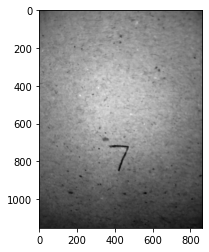

(1152, 864)
re image 
 (128, 128)


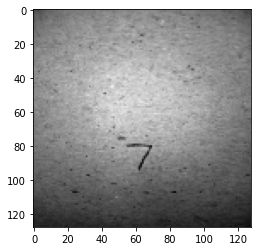

(128, 128, 1)
214


In [ ]:
from __future__ import division
import PIL
from PIL import Image
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cv2
import numpy as np

"""ii = cv2.imread("k.jpeg")


print("kkkkkkkkkkkkkkkkkkkkkk",ii.shape) 
gray_image = cv2.cvtColor(ii, cv2.COLOR_BGR2GRAY)
print(gray_image)
plt.imshow(gray_image,cmap='gray')
plt.show()

print(gray_image.shape)


img = cv2.resize(gray_image, (128,128))
newimg = np.asarray(img)

# NORMALIZE 0-255 TO 0-1

newimg = newimg.astype('float32')
re_image = newimg/ 255
print("re image \n",re_image.shape)

plt.imshow(re_image,cmap='gray')
plt.show()


y = np.expand_dims(newimg, axis=-1)
print(y.shape)
inp = np.array(y)
pred = model.predict(inp.reshape(1, 128, 128, 1))

print(np.argmax(pred))
"""
#print(pred)

#print(y_train(y))



# randomly rotate an image
original_img = X_test[0]
true_angle = np.random.randint(360)
rotated_img = rotate(original_img, true_angle)
print('True angle: ', true_angle)

# add dimensions to account for the batch size and channels, 
rotated_img = rotated_img[np.newaxis, :, :, np.newaxis]
# convert to float
rotated_img = rotated_img.astype('float32')
# binarize image
rotated_img_bin = binarize_images(rotated_img)
# predict rotation angle
output = model.predict(rotated_img_bin)
predicted_angle = np.argmax(output)
print('Predicted angle: ', predicted_angle)






---------------------------------------


=========PREDICTION============ 




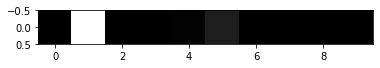



Final Output: 1
[[1.8178378e-06 3.4490633e-03 6.3154812e-06 1.1047626e-06 4.3188866e-05
  4.0492829e-04 3.9816978e-06 1.0939488e-05 1.2424319e-08 2.1665763e-07]]


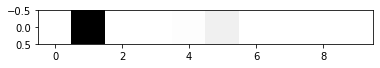

In [ ]:

#  I don't how to work with real world data , but i try to solve this .... pls comment how to solve this issue 


print ("\n\n---------------------------------------\n\n")
print ("=========PREDICTION============ \n\n")
plt.imshow(pred, cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(pred)))



img = pred.astype('float32')
img = img/255.0


print(img)
plt.imshow(img, cmap='Greys' )
plt.show()